# Check Regression Assumptions

Haytham Mohamed - INFS890 Spring 2020

This notebook is to check regression Normality and Linearity assumptions of the orders work flow.

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn import preprocessing
from datetime import datetime
from scipy import stats
from sklearn.decomposition import PCA

sns.set()
sns.set(color_codes=True)
#sns.set_color_codes()

pd.options.display.max_rows = 15
pd.options.display.float_format = '{:,.3f}'.format

In [104]:
# 1- read processed file

home_dir = '/Users/hmohamed/github/data-research-spring2020/sock-shop'

file_dir = home_dir + '/processed-data/'
input_file = 'order_flow_cleanup_data.csv'

save=True

In [90]:
def read_df(file_dir, data_file):
    df = pd.read_csv(file_dir + data_file)
    return to_time_series(df)

def to_time_series(df, index_col_name='date'):
    df[index_col_name] = pd.to_datetime(df[index_col_name])
    df.set_index(index_col_name, inplace=True)
    df.sort_index(inplace=True)
    return df

In [91]:
orders_flow_df = read_df(file_dir, input_file)
idx = orders_flow_df.index
orders_flow_df.head(5) 

,front-end_cpu_use,orders_cpu_use,orders-db_cpu_use,user_cpu_use,user-db_cpu_use,shipping_cpu_use,payment_cpu_use,carts_cpu_use,carts-db_cpu_use,nodes_cpu_use,orders_ltcy
date,,,,,,,,,,,
2020-03-27 00:00:22,0.020,0.170,0.010,0.020,0.020,0.560,0.020,0.570,0.010,1.840,0.240
2020-03-27 00:00:37,0.030,0.180,0.010,0.020,0.010,0.560,0.020,0.580,0.010,1.890,0.240
2020-03-27 00:00:52,0.050,0.080,0.010,0.030,0.020,0.470,0.020,0.640,0.080,1.740,0.240
2020-03-27 00:01:07,0.100,0.090,0.010,0.030,0.020,0.280,0.020,0.630,0.200,1.790,0.240
2020-03-27 00:01:22,0.110,0.180,0.010,0.040,0.020,0.090,0.020,0.520,0.220,1.610,0.240


In [92]:
orders_flow_df.shape

(5711, 11)

# Examine the data

In [93]:
orders_flow_df.describe(include="all")

,front-end_cpu_use,orders_cpu_use,orders-db_cpu_use,user_cpu_use,user-db_cpu_use,shipping_cpu_use,payment_cpu_use,carts_cpu_use,carts-db_cpu_use,nodes_cpu_use,orders_ltcy
count,"5,711.000","5,711.000","5,711.000","5,711.000","5,711.000","5,711.000","5,711.000","5,711.000","5,711.000","5,711.000","5,711.000"
mean,0.862,0.215,0.021,0.202,0.119,0.055,0.035,0.562,1.852,4.171,3.356
std,0.654,0.137,0.005,0.141,0.084,0.034,0.010,0.614,2.028,2.179,3.597
min,0.020,0.020,0.010,0.020,0.010,0.020,0.010,0.050,0.010,1.230,0.096
25%,0.070,0.050,0.020,0.040,0.020,0.040,0.030,0.060,0.020,1.360,0.240
50%,0.960,0.220,0.020,0.200,0.120,0.050,0.040,0.310,1.170,4.380,1.424
75%,1.350,0.310,0.020,0.310,0.190,0.060,0.040,1.000,3.320,5.970,6.854
max,2.730,0.910,0.040,0.640,0.340,0.630,0.100,2.530,6.580,9.660,9.730


# Check Regression Assumptions

## 1- Normality

Examining the Normal Probability Distribution for the rest of the variables

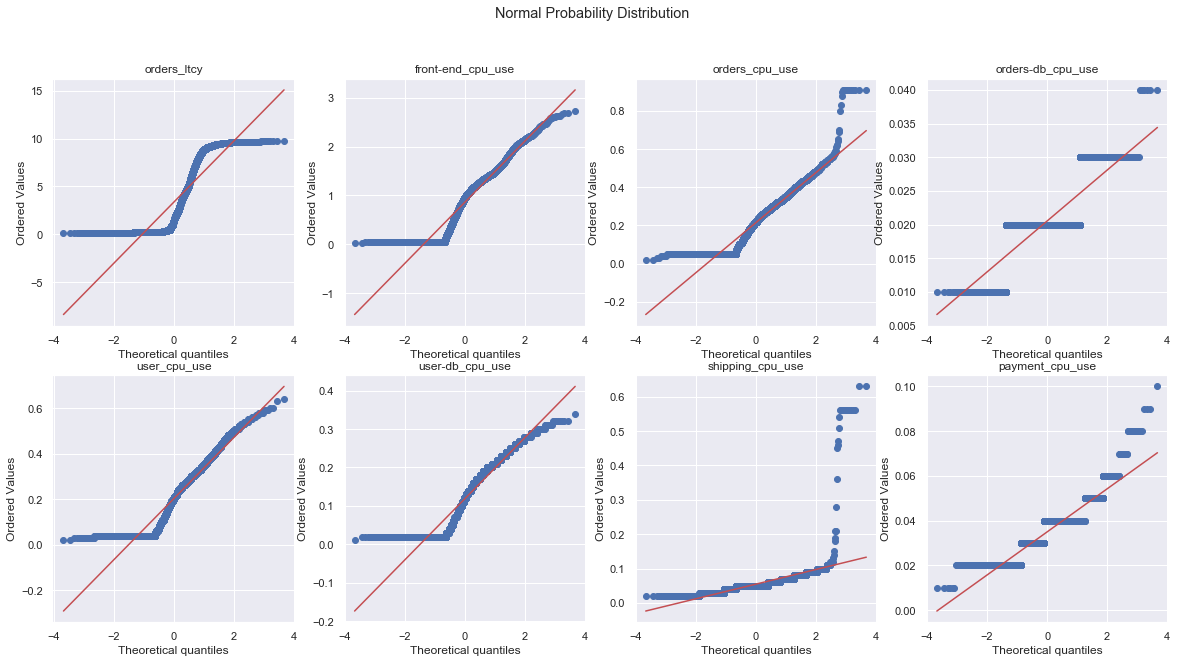

In [94]:
fig, ax = plt.subplots(2,4,figsize=(20,10))

# log_ltcy should look ok as its transformed above
stats.probplot(orders_flow_df['orders_ltcy'], plot=ax[0,0])
ax[0, 0].set_title('orders_ltcy')

stats.probplot(orders_flow_df['front-end_cpu_use'], plot=ax[0,1])
ax[0, 1].set_title('front-end_cpu_use')

stats.probplot(orders_flow_df['orders_cpu_use'], plot=ax[0,2])
ax[0, 2].set_title('orders_cpu_use')

stats.probplot(orders_flow_df['orders-db_cpu_use'], plot=ax[0,3])
ax[0, 3].set_title('orders-db_cpu_use')

stats.probplot(orders_flow_df['user_cpu_use'], plot=ax[1,0])
ax[1, 0].set_title('user_cpu_use')

stats.probplot(orders_flow_df['user-db_cpu_use'], plot=ax[1,1])
ax[1, 1].set_title('user-db_cpu_use')

stats.probplot(orders_flow_df['shipping_cpu_use'], plot=ax[1,2])
ax[1, 2].set_title('shipping_cpu_use')

stats.probplot(orders_flow_df['payment_cpu_use'], plot=ax[1,3])
ax[1, 3].set_title('payment_cpu_use')



fig.suptitle('Normal Probability Distribution')
plt.show()

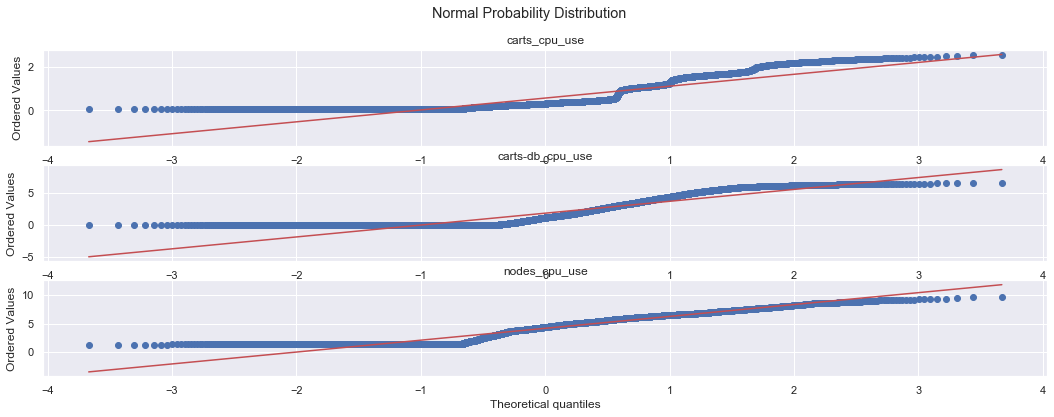

In [95]:
fig, ax = plt.subplots(3,figsize=(18,6))

stats.probplot(orders_flow_df['carts_cpu_use'], plot=ax[0])
ax[0].set_title('carts_cpu_use')

stats.probplot(orders_flow_df['carts-db_cpu_use'], plot=ax[1])
ax[1].set_title('carts-db_cpu_use')

stats.probplot(orders_flow_df['nodes_cpu_use'], plot=ax[2])
ax[2].set_title('nodes_cpu_use')

#stats.probplot(orders_flow_df['svc_req_size'], plot=ax[1,0])
#ax[1, 0].set_title('svc_req_size')

#stats.probplot(orders_flow_df['svc_resp_size'], plot=ax[1,1])
#ax[1, 1].set_title('svc_resp_size')

#stats.probplot(orders_flow_df['svc_pods'], plot=ax[1,2])
#ax[1, 2].set_title('svc_pods')

#stats.probplot(orders_flow_df['svc_req_rate'], plot=ax[2,0])
#ax[2, 0].set_title('svc_req_rate')

fig.suptitle('Normal Probability Distribution')
plt.show()

above Normal Probability Plots (MPP) illustrates so low variance for "orders-db_cpu_use" variable. Apparently, the orders-db_cpu_use is not affected when applying different loads to the application. We will drop this varible and not consider it.

In [96]:
orders_flow_df = orders_flow_df.drop('orders-db_cpu_use', 1)

# Checking Regression Assumptions

## Linearity

examine features to target scatterplot

In [97]:
variables = orders_flow_df.columns.values
for var in variables:
    print(var)

front-end_cpu_use
orders_cpu_use
user_cpu_use
user-db_cpu_use
shipping_cpu_use
payment_cpu_use
carts_cpu_use
carts-db_cpu_use
nodes_cpu_use
orders_ltcy


Plot every variable against the latency 

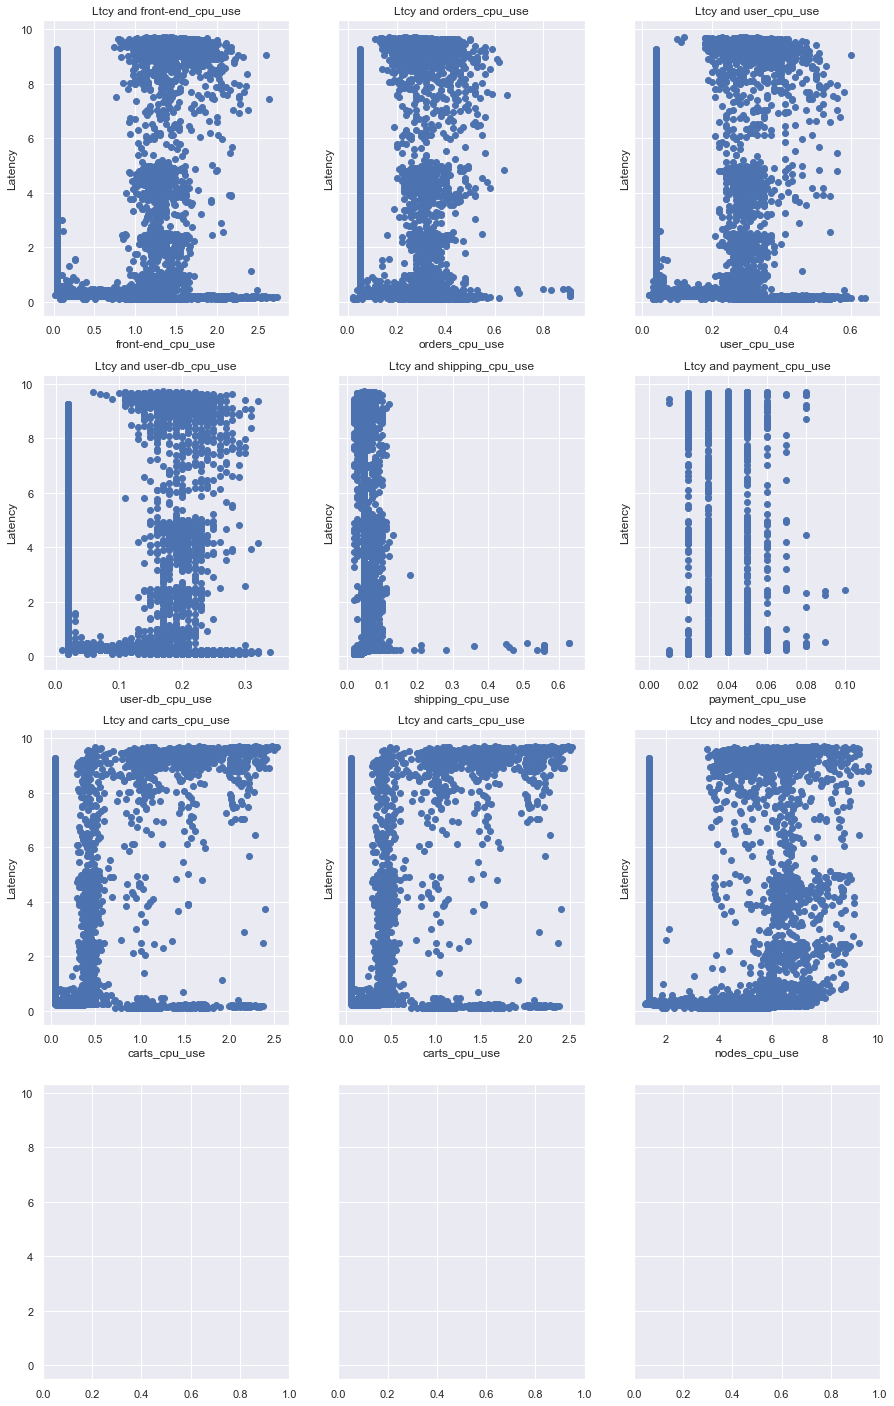

In [98]:
f, ax = plt.subplots(4, 3, sharey=True, figsize = (15,25))

ax[0,0].scatter(orders_flow_df['front-end_cpu_use'], orders_flow_df['orders_ltcy'])
ax[0,0].set_title('Ltcy and front-end_cpu_use')
ax[0,0].set_xlabel('front-end_cpu_use')
ax[0,0].set_ylabel('Latency')

ax[0,1].scatter(orders_flow_df['orders_cpu_use'], orders_flow_df['orders_ltcy'])
ax[0,1].set_title('Ltcy and orders_cpu_use')
ax[0,1].set_xlabel('orders_cpu_use')
ax[0,1].set_ylabel('Latency')

ax[0,2].scatter(orders_flow_df['user_cpu_use'], orders_flow_df['orders_ltcy'])
ax[0,2].set_title('Ltcy and user_cpu_use')
ax[0,2].set_xlabel('user_cpu_use')
ax[0,2].set_ylabel('Latency')

ax[1,0].scatter(orders_flow_df['user-db_cpu_use'], orders_flow_df['orders_ltcy'])
ax[1,0].set_title('Ltcy and user-db_cpu_use')
ax[1,0].set_xlabel('user-db_cpu_use')
ax[1,0].set_ylabel('Latency')

ax[1,1].scatter(orders_flow_df['shipping_cpu_use'], orders_flow_df['orders_ltcy'])
ax[1,1].set_title('Ltcy and shipping_cpu_use')
ax[1,1].set_xlabel('shipping_cpu_use')
ax[1,1].set_ylabel('Latency')

ax[1,2].scatter(orders_flow_df['payment_cpu_use'], orders_flow_df['orders_ltcy'])
ax[1,2].set_title('Ltcy and payment_cpu_use')
ax[1,2].set_xlabel('payment_cpu_use')
ax[1,2].set_ylabel('Latency')

ax[2,0].scatter(orders_flow_df['carts_cpu_use'], orders_flow_df['orders_ltcy'])
ax[2,0].set_title('Ltcy and carts_cpu_use')
ax[2,0].set_xlabel('carts_cpu_use')
ax[2,0].set_ylabel('Latency')

ax[2,1].scatter(orders_flow_df['carts_cpu_use'], orders_flow_df['orders_ltcy'])
ax[2,1].set_title('Ltcy and carts_cpu_use')
ax[2,1].set_xlabel('carts_cpu_use')
ax[2,1].set_ylabel('Latency')

ax[2,2].scatter(orders_flow_df['nodes_cpu_use'], orders_flow_df['orders_ltcy'])
ax[2,2].set_title('Ltcy and nodes_cpu_use')
ax[2,2].set_xlabel('nodes_cpu_use')
ax[2,2].set_ylabel('Latency')



plt.show()

In [99]:
if save:
    orders_flow_df.to_csv(path_or_buf=file_dir + 'order_flow_normalized_data.csv', index=True)

# Standardize Features

In [103]:
# Also save a standard normalized data to use with MLP

from sklearn.preprocessing import StandardScaler

targets = orders_flow_df['orders_ltcy']
inputs = orders_flow_df.drop(['orders_ltcy'], axis=1)

variables = inputs.columns.values

print('shape of inputs %', inputs.shape)

scaler = StandardScaler()
scaler.fit(inputs)
standarized_inputs = scaler.transform(inputs)
standarized_inputs = pd.DataFrame(standarized_inputs, columns=variables)

targets = pd.DataFrame(targets.values, columns=['orders_ltcy'])

scaled_data = pd.concat([standarized_inputs,targets], axis=1, sort=False)
scaled_data['date'] = idx
scaled_data = to_time_series(scaled_data)

if save:
     scaled_data.to_csv(path_or_buf=file_dir + 'order_flow_standardized_data.csv', index=True)
        
scaled_data.head()        
    

shape of inputs % (5711, 9)


,front-end_cpu_use,orders_cpu_use,user_cpu_use,user-db_cpu_use,shipping_cpu_use,payment_cpu_use,carts_cpu_use,carts-db_cpu_use,nodes_cpu_use,orders_ltcy
date,,,,,,,,,,
2020-03-27 00:00:22,-1.288,-0.327,-1.292,-1.179,14.710,-1.452,0.013,-0.908,-1.070,0.240
2020-03-27 00:00:37,-1.273,-0.254,-1.292,-1.298,14.710,-1.452,0.029,-0.908,-1.047,0.240
2020-03-27 00:00:52,-1.242,-0.984,-1.221,-1.179,12.090,-1.452,0.127,-0.873,-1.116,0.240
2020-03-27 00:01:07,-1.166,-0.911,-1.221,-1.179,6.558,-1.452,0.111,-0.814,-1.093,0.240
2020-03-27 00:01:22,-1.151,-0.254,-1.150,-1.179,1.027,-1.452,-0.068,-0.804,-1.175,0.240
